In [5]:
!pip install pandas numpy matplotlib

    100% |████████████████████████████████| 10.1MB 1.3MB/s ta 0:00:01    32% |██████████▍                     | 3.3MB 725kB/s eta 0:00:10    36% |███████████▋                    | 3.7MB 680kB/s eta 0:00:10    43% |██████████████                  | 4.4MB 517kB/s eta 0:00:12    56% |██████████████████              | 5.7MB 801kB/s eta 0:00:06    98% |███████████████████████████████▊| 10.0MB 1.4MB/s eta 0:00:01
    100% |████████████████████████████████| 17.3MB 1.3MB/s ta 0:00:01 0% |                                | 51kB 5.2MB/s eta 0:00:04    3% |█▏                              | 614kB 1.4MB/s eta 0:00:13    17% |█████▌                          | 2.9MB 1.4MB/s eta 0:00:11    28% |█████████                       | 4.9MB 1.7MB/s eta 0:00:08    51% |████████████████▍               | 8.9MB 2.3MB/s eta 0:00:04    55% |█████████████████▋              | 9.5MB 2.2MB/s eta 0:00:04    91% |█████████████████████████████▍  | 15.9MB 3.5MB/s eta 0:00:01
    100% |████████████████████████████████| 12.9

# Introduccion a Pandas, analisis y manejo de datos.
Ahora veremos las estructuras principales que maneja la libreria de pandas

Pandas es una libreria basada en Numpy para la manipulacion y analisis de datos.

Maneja desde tablas numericas hasta series de tiempo.

In [2]:


import pandas as pd # libreria manipulacion de datos
import numpy as np # calculo numerico
import matplotlib.pyplot as plt # graficacion

plt.style.use('ggplot') #embellecer graficas

%matplotlib inline 

# Seleccion de Datos
Existen dos tipos de estructuras principales en python
    
    + Series: lista con valores (como un diccionario)
    + Dataframes: tabla de excel con columnas -- e indices |
    
Se pueden generar con diccionarios o listas los dataframes

In [3]:
# series
dict_paises = {'Germany': 81.3, 'Belgium': 11.3, 'France': 64.3, 
                        'United Kingdom': 64.9, 'Netherlands': 16.9}
population = pd.Series(dict_paises)
population


Germany           81.3
Belgium           11.3
France            64.3
United Kingdom    64.9
Netherlands       16.9
dtype: float64

In [4]:
# dataframe
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

country  population    area    capital
0         Belgium        11.3   30510   Brussels
1          France        64.3  671308      Paris
2         Germany        81.3  357050     Berlin
3     Netherlands        16.9   41526  Amsterdam
4  United Kingdom        64.9  244820     London

Para colocar  un valor como indice y poderlo seleccionar más facil con el siguiene comando:

In [5]:
countries.set_index('country', inplace=True)

In [6]:
countries

population    area    capital
country                                      
Belgium               11.3   30510   Brussels
France                64.3  671308      Paris
Germany               81.3  357050     Berlin
Netherlands           16.9   41526  Amsterdam
United Kingdom        64.9  244820     London

Existen dos maneras de seleccionar datos en pandas:
 + Una es por columnas
 + O por posicion de fila

In [7]:
countries.index #indices
countries.columns #columnas

Index(['population', 'area', 'capital'], dtype='object')

In [8]:
#Para elegir una fila solo es necesario elegir la columna con el siguiente formato
#cabe mencionar que nos devolvera una serie
#Cualquierade las dos es valida

#countries['capital']
countries.area

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

In [9]:
countries

population    area    capital
country                                      
Belgium               11.3   30510   Brussels
France                64.3  671308      Paris
Germany               81.3  357050     Berlin
Netherlands           16.9   41526  Amsterdam
United Kingdom        64.9  244820     London

In [10]:
countries.loc['France']

population      64.3
area          671308
capital        Paris
Name: France, dtype: object

In [11]:
#Si queremos seleccionar multiples columnas
countries[['area','population']]
#Esto funciona para limpiar de columnas que no nos funcionan

area  population
country                           
Belgium          30510        11.3
France          671308        64.3
Germany         357050        81.3
Netherlands      41526        16.9
United Kingdom  244820        64.9

In [23]:
countries.iloc[1:3,:]

population    area capital
country                            
France         64.3  671308   Paris
Germany        81.3  357050  Berlin

In [ ]:
#lo podemos hacer por condicionales, por ejemplo
countries[countries.capital == 'Paris']

In [ ]:
[countries.capital == 'Paris']

In [ ]:
#que es lo mismo como antes
countries.loc[countries.capital != 'Paris']

In [ ]:
#si queremos obtener por una fila en especifico seria por index:
countries.iloc[1:3]

## Datos titanic
leeremos un archivo csv o xslx para analizar los datos y generaremos algunos graficos y medicion de metricas improtantes

In [27]:
datos = pd.read_csv("./titanic.csv")
datos.info()
datos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb49dd5bbe0>,
      dtype=object)

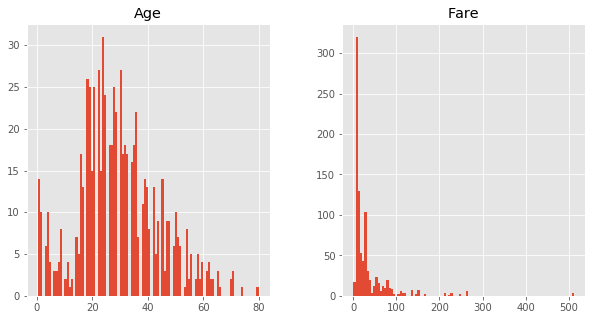

In [28]:
datos[['Age', 'Fare']].hist(bins=100, figsize=(10,5))

In [29]:
datos.median()

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [30]:
datos[['Age', 'Fare']].mode()

Age  Fare
0  24.0  8.05

In [31]:
datos.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [32]:
#quantil 75
datos.quantile(0.75)

PassengerId    668.5
Survived         1.0
Pclass           3.0
Age             38.0
SibSp            1.0
Parch            0.0
Fare            31.0
Name: 0.75, dtype: float64

In [33]:
datos.Sex.value_counts(normalize = True) * 100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

# Ejercicios

A) Indicame como es el promedio de edad de los que representan mas del quantil 75.

B) Como es la distribucion de la edad

C) De ellos cual es el porcentaje de sobrevientes

In [34]:
mayor75 = datos[datos.Age > datos.Age.quantile(0.75)]
mayor75.Age.mean()

49.29943502824859

In [ ]:
datos['Sex'].hist(bins=50)

In [ ]:
mayor75.Age.hist(bins = 50)
plt.title('Distribucion de la edad')
plt.xlabel('EDAD')

In [ ]:
mayor75.Survived.value_counts(
    normalize=True).plot.bar(rot = 0,title = 'sobrevivientes viejitos')

In [ ]:
mayor75.Survived.mean() * 100

In [ ]:
perc_mayor75 = mayor75.Sex.value_counts(normalize=True) * 100
perc_mayor75.plot.bar(rot=0, )
plt.title('Distribucion de Sexo', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=14)

In [ ]:
mayor_a_75.Age.hist(bins=50)
plt.title('Distribucion de Edad', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=14)

In [ ]:
mayor_a_75.Survived.value_counts(normalize=True).plot.bar(rot=0)
plt.title('Distribucion de Sobrevivientes', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=14)